In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

In [2]:
happiness=pd.read_csv('C:/Users/clair/Desktop/Flex 4/Python/2018.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [3]:
new_happiness=happiness.rename(columns={'Country or region':'Country'})
new_happiness

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [4]:
indi= pd.read_excel('C:/Users/clair/Desktop/Flex 4/Python/DESI.xlsx')
indi

,Year,Indicator,Country,Country Code,Weighted Score
0,2018,1 Connectivity,Denmark,DK,19.62050
1,2018,1 Connectivity,Sweden,SE,18.99630
2,2018,1 Connectivity,Finland,FI,16.51320
3,2018,1 Connectivity,Netherlands,NL,20.28300
4,2018,1 Connectivity,Luxembourg,LU,20.01320
...,...,...,...,...,...
720,2014,5 Digital Public Services,Cyprus,CY,5.67363
721,2014,5 Digital Public Services,Italy,IT,6.66327
722,2014,5 Digital Public Services,Greece,EL,3.52628
723,2014,5 Digital Public Services,Bulgaria,BG,5.62862


Filter out to year 2018 so this dataset can merged with the happiness dataset. 

In [5]:
indi_sorted= indi.loc[indi['Year']== 2018]
indi_sorted

,Year,Indicator,Country,Country Code,Weighted Score
0,2018,1 Connectivity,Denmark,DK,19.62050
1,2018,1 Connectivity,Sweden,SE,18.99630
2,2018,1 Connectivity,Finland,FI,16.51320
3,2018,1 Connectivity,Netherlands,NL,20.28300
4,2018,1 Connectivity,Luxembourg,LU,20.01320
...,...,...,...,...,...
140,2018,5 Digital Public Services,Poland,PL,7.23117
141,2018,5 Digital Public Services,Italy,IT,7.87550
142,2018,5 Digital Public Services,Bulgaria,BG,7.45758
143,2018,5 Digital Public Services,Greece,EL,5.88589


Using groupby function with 'Country' to get the average 'Weighted Score'.

In [6]:
indi1= indi_sorted.groupby('Country').agg({'Weighted Score':['mean']})
indi1

,Weighted Score
,mean
Country,
Austria,11.591328
Belgium,12.146912
Bulgaria,8.205870
Croatia,9.332520
Cyprus,9.868444
Czech Republic,10.464572
Denmark,14.345200
Estonia,11.948218


In [7]:
indi2=indi1.stack().reset_index()
new_indi=indi2.drop(columns='level_1')
new_indi

,Country,Weighted Score
0,Austria,11.591328
1,Belgium,12.146912
2,Bulgaria,8.205870
3,Croatia,9.332520
4,Cyprus,9.868444
5,Czech Republic,10.464572
6,Denmark,14.345200
7,Estonia,11.948218
8,European Union 28,10.795790
9,Finland,14.021244


In [8]:
new_indi.shape

(29, 2)

Merge two dataset together using outer join. 

In [9]:
fulldata=pd.merge(new_happiness,new_indi,on='Country',how='outer')
fulldata

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighted Score
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,14.021244
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,NaN
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,14.345200
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,NaN
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,NaN
...,...,...,...,...,...,...,...,...,...,...
152,153.0,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,NaN
153,154.0,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,NaN
154,155.0,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,NaN
155,156.0,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,NaN


In [10]:
fulldata.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighted Score
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,29.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000,10.939829
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492,1.862677
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.509222
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000,9.868444
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000,10.795790
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000,12.146912
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000,14.345200


In [11]:
fulldata.shape

(157, 10)

In [12]:
fulldata.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Weighted Score'],
      dtype='object')

In [13]:
fulldata.dtypes

Overall rank                    float64
Country                          object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Weighted Score                  float64
dtype: object

Count the null value in each column of the dataset.

In [14]:
fulldata.isnull().sum()

Overall rank                      1
Country                           0
Score                             1
GDP per capita                    1
Social support                    1
Healthy life expectancy           1
Freedom to make life choices      1
Generosity                        1
Perceptions of corruption         2
Weighted Score                  128
dtype: int64

Check to see the percentage of missing values within the column ' Weighted Score'. 

In [15]:
missing_percentage=fulldata['Weighted Score'].isna().sum()/len(fulldata['Weighted Score'])*100
missing_percentage

81.52866242038218

Missing values in 'Weighted Score' column contains 81 % of the total values . 

Imputation median into the missing value.

Use apply function to impute median into null values. 

In [16]:
impute_data=fulldata.apply(lambda x: x.fillna(fulldata.median()),axis=1)
impute_data

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighted Score
0,1.0,Finland,7.632,1.3050,1.592,0.874,0.681,0.202,0.393,14.021244
1,2.0,Norway,7.594,1.4560,1.582,0.861,0.686,0.286,0.340,10.795790
2,3.0,Denmark,7.555,1.3510,1.590,0.868,0.683,0.284,0.408,14.345200
3,4.0,Iceland,7.495,1.3430,1.644,0.914,0.677,0.353,0.138,10.795790
4,5.0,Switzerland,7.487,1.4200,1.549,0.927,0.660,0.256,0.357,10.795790
...,...,...,...,...,...,...,...,...,...,...
152,153.0,Tanzania,3.303,0.4550,0.991,0.381,0.481,0.270,0.097,10.795790
153,154.0,South Sudan,3.254,0.3370,0.608,0.177,0.112,0.224,0.106,10.795790
154,155.0,Central African Republic,3.083,0.0240,0.000,0.010,0.305,0.218,0.038,10.795790
155,156.0,Burundi,2.905,0.0910,0.627,0.145,0.065,0.149,0.076,10.795790


Since 'Overrall rank' and 'Score' has the same meaning so I choose to drop out one of them. 

In [17]:
final_data=impute_data.drop(columns=['Overall rank'])
final_data

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Weighted Score
0,Finland,7.632,1.3050,1.592,0.874,0.681,0.202,0.393,14.021244
1,Norway,7.594,1.4560,1.582,0.861,0.686,0.286,0.340,10.795790
2,Denmark,7.555,1.3510,1.590,0.868,0.683,0.284,0.408,14.345200
3,Iceland,7.495,1.3430,1.644,0.914,0.677,0.353,0.138,10.795790
4,Switzerland,7.487,1.4200,1.549,0.927,0.660,0.256,0.357,10.795790
...,...,...,...,...,...,...,...,...,...
152,Tanzania,3.303,0.4550,0.991,0.381,0.481,0.270,0.097,10.795790
153,South Sudan,3.254,0.3370,0.608,0.177,0.112,0.224,0.106,10.795790
154,Central African Republic,3.083,0.0240,0.000,0.010,0.305,0.218,0.038,10.795790
155,Burundi,2.905,0.0910,0.627,0.145,0.065,0.149,0.076,10.795790


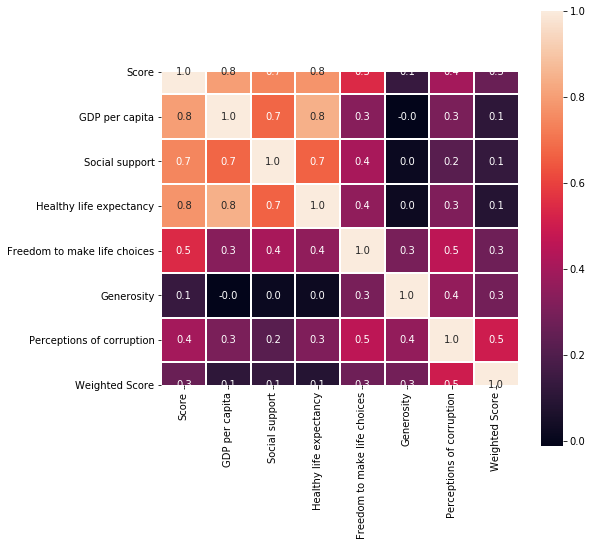

In [72]:
f,ax = plt.subplots(figsize = (8, 8))
sns.heatmap(final_data.corr(), annot = True, linewidths = 1, fmt = '.1f', ax = ax, square = True)

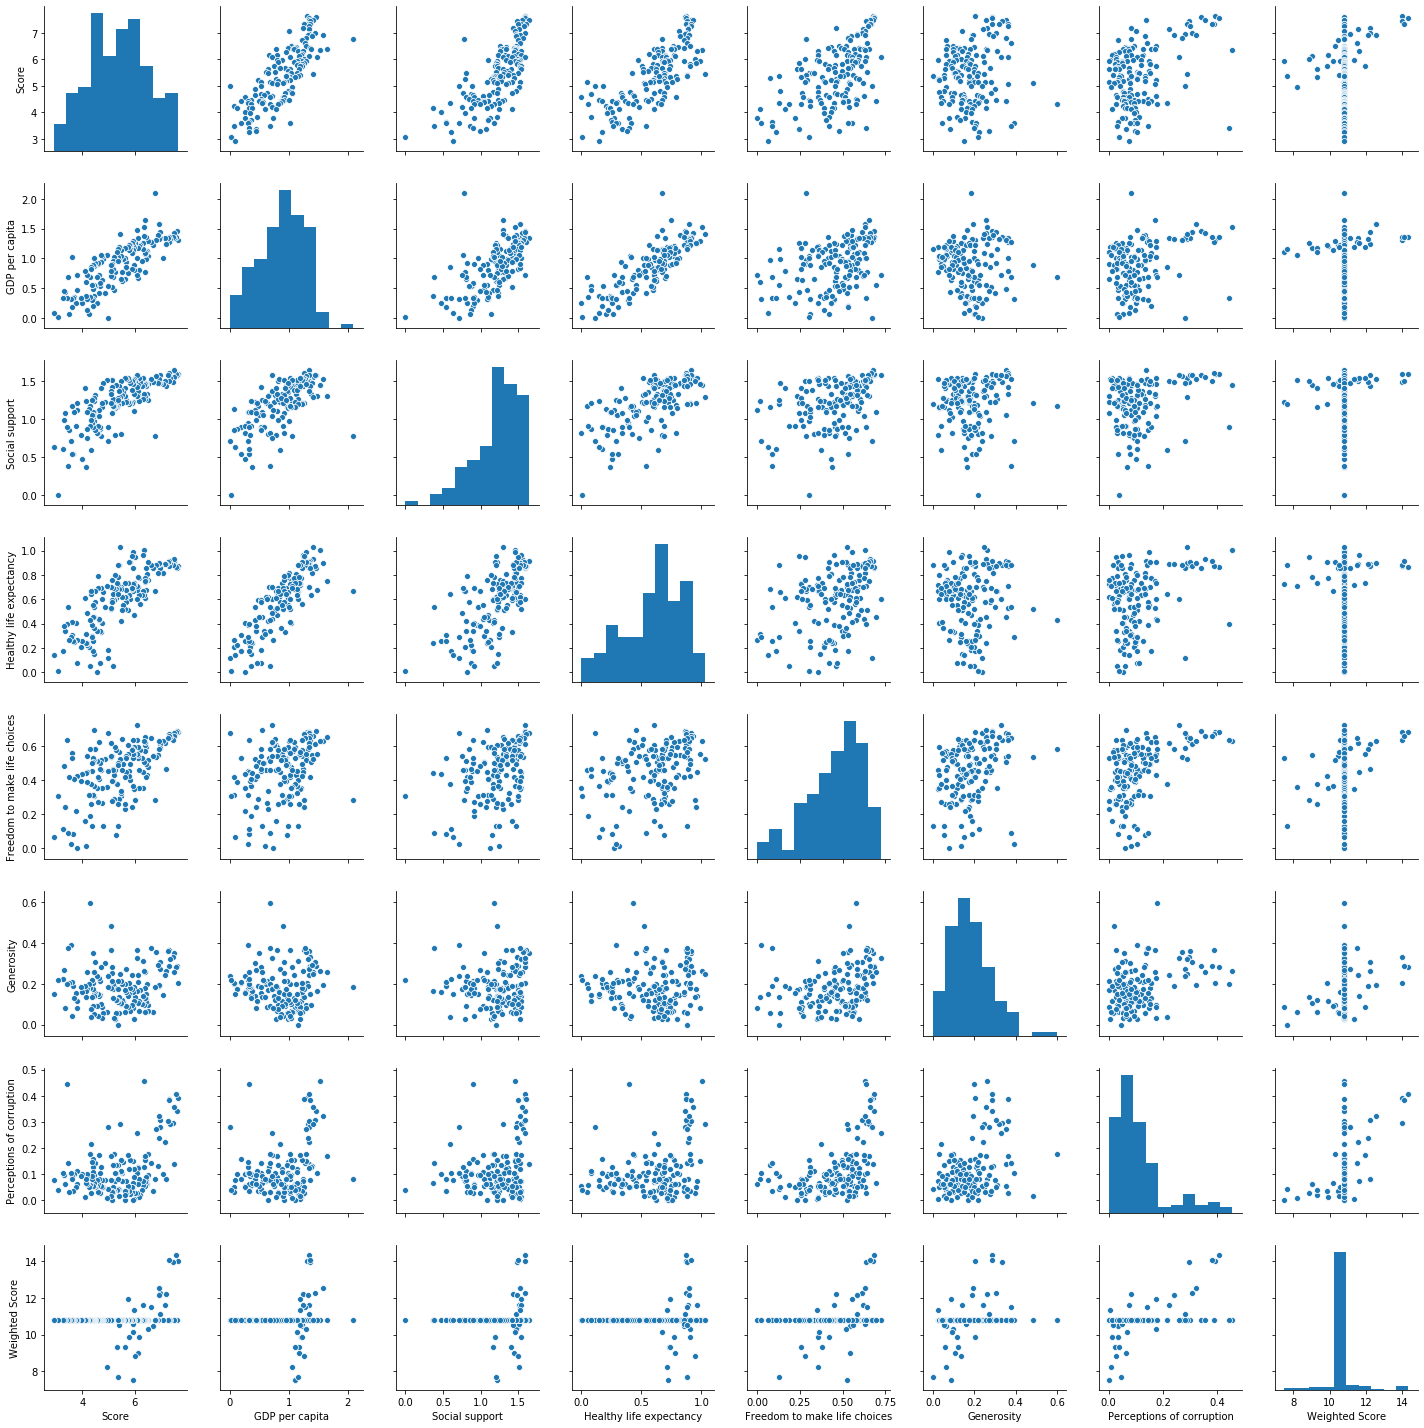

In [21]:
sns.pairplot(final_data)

Build model for the dataset to find best model describe the relationship between happiness score and other variables.

In [75]:
X=final_data.drop(['Country','Score'],axis=1)

In [81]:
y=final_data['Score']

Test the model with prediction capability. <br>
Split the dataset into train and test. 

In [130]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=8451)
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

Check the new subset 

In [101]:
Xtrain.shape

(117, 7)

In [102]:
Xtest.shape

(40, 7)

In [99]:
ytrain.shape

(117,)

In [100]:
ytest.shape

(40,)

Train the model with train test dataset. 

In [131]:
lm.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

See the R score of the model or evaluate how well the model can represent the dataset.

In [132]:
lm.score(Xtrain,ytrain)

0.7773767942401042

Find the coeffients and intercept of the model. 

In [133]:
lm.coef_,lm.intercept_

(array([1.13528859, 0.82537148, 0.83025156, 1.387132  , 0.07180641,
        0.34293284, 0.13988167]), 0.6705161563466611)

Test the prediction.

In [134]:
predictions = lm.predict( Xtest)

See the R score of the model or evaluate how well the model can perform prediction.

In [135]:
lm.score(Xtest,ytest)

0.8177514418912339

Create scatter plot to see how the real observation comparing with the predicted value.

Text(0, 0.5, 'Predicted Y')

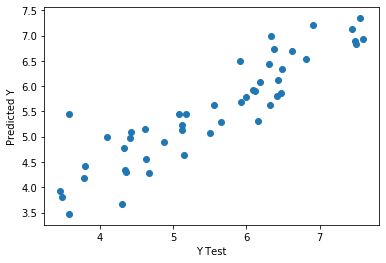

In [136]:
plt.scatter(ytest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [137]:
print('MAE:', metrics.mean_absolute_error(ytest, predictions))
print('MSE:', metrics.mean_squared_error(ytest, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))

MAE: 0.39875619479689534
MSE: 0.25908169806494796
RMSE: 0.5090006857214909


In [138]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GDP per capita,1.135289
Social support,0.825371
Healthy life expectancy,0.830252
Freedom to make life choices,1.387132
Generosity,0.071806
Perceptions of corruption,0.342933
Weighted Score,0.139882


In [149]:
pvalues_(lm)

NameError: name 'pvalues_' is not defined

In [25]:
final_data.columns

Index(['Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Weighted Score'],
      dtype='object')

In [26]:
final_data['Weighted Score']

0      14.021244
1      10.795790
2      14.345200
3      10.795790
4      10.795790
         ...    
152    10.795790
153    10.795790
154    10.795790
155    10.795790
156    10.795790
Name: Weighted Score, Length: 157, dtype: float64

In [34]:
final_data.isna().values.sum()

0

In [54]:
final_data.dtypes

Country                          object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Weighted Score                  float64
dtype: object